In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


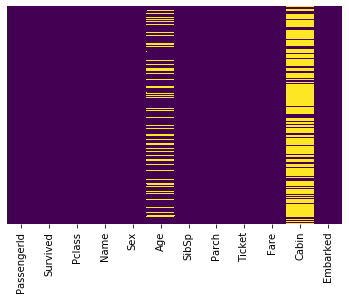

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
train.apply(lambda x : sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

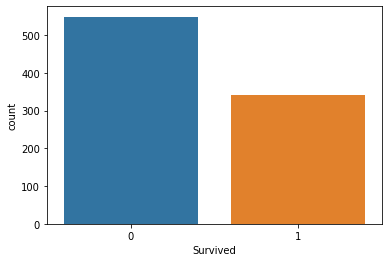

In [8]:
sns.countplot(x='Survived',data=train)

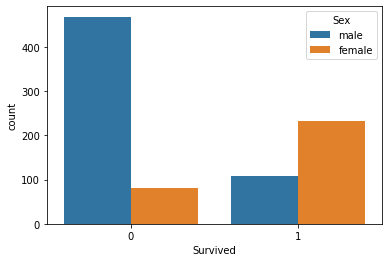

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train)

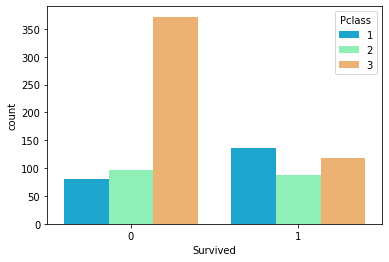

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

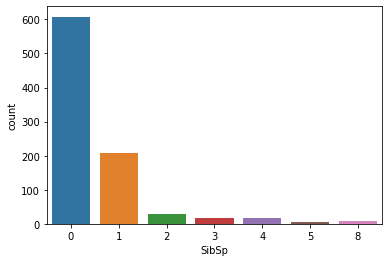

In [14]:
sns.countplot(x='SibSp',data=train)

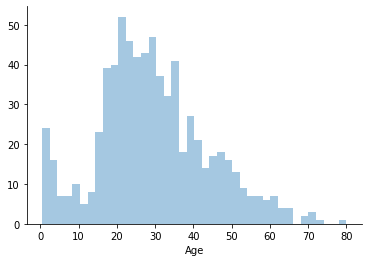

In [19]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)
sns.despine()

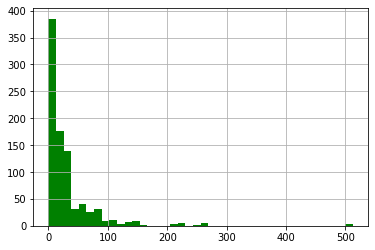

In [20]:
train['Fare'].hist(color='green',bins=40)

# Data Cleaning

In [22]:
train.Age=train.Age.fillna(train.Age.mean())

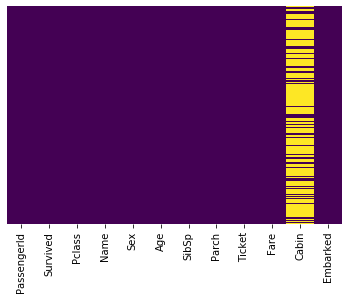

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
#Cabin does not play any role in predictions.So,we can drop this feature
train.drop('Cabin',axis=1,inplace=True)

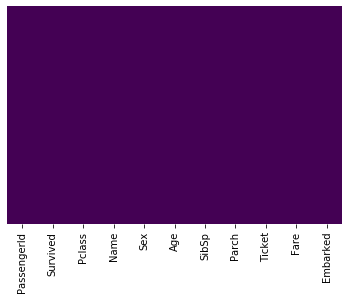

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
df_log = train['Survived']

In [35]:
df_log.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
df = train.drop(['Survived'],axis=1) 

## Converting Categorical variables
We'll need to convert categorical features to dummy variables using pandas so that they can fit into the machine learning algorithm as inputs.

In [38]:
df = pd.get_dummies(df, columns=['Sex','Embarked','Name','Ticket'])

In [39]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Logistic Regression model

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df_log, test_size=0.30, 
                                                    random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[137,  17],
       [ 39,  75]], dtype=int64)

# Evaluation

In [45]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7910447761194029

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

